In [12]:
#2022/3/26
#new home validation
import os, sys, gc
import pandas as pd
import numpy as np
import yaml
import os
import glob
import ipystata
import geohash2 as gh
import re
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
from math import radians, cos, sin, asin, sqrt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [13]:
#file = "C:/Users/Justin/Dropbox/Amenity/data/analysis/veraset_gravy_gps_sample/new_veraset_home_validation_week.csv"

#for file in os.listdir(path):
    # print(file)
file =  "C:/Users/Justin/Desktop/m.csv"
df = pd.read_csv(file)
geohash = df.columns.tolist().index('geohash7')
        #generate geohash
df['our_geohash'] = df.apply(lambda x: gh.decode(x[geohash]), axis =1)
df.to_csv(file)
#remind that when geohash is "" or "null" in the csv file, it will be a typeerror : float can't be iterable, so please cancel the "null"
# there are long string includes lat and lon when open the datafile, need to apart them and destring (I use stata to do this)

In [14]:
file = "C:/Users/Justin/Desktop/m.csv"
df = pd.read_csv(file)

In [4]:
df = pd.read_csv(file)
geohash1 = df.columns.tolist().index('geohash5_imputed')
        #generate geohash
df['our_geohash'] = df.apply(lambda x: gh.decode(x[geohash1]), axis =1)
df.to_csv(file)

In [6]:
df = pd.read_csv(file)
df.head()
veraset_geohash = df[['veraset_geohash']]
veraset_geohash = str(veraset_geohash)
#regex to extract the data
num= df['veraset_geohash'].str.extractall(pat = r'[\'](.*?)[\']')
num = num.unstack()
#df['veraset_lon']= num['0']
#df['veraset_lat']= num['1']
#num1 = num['1']
print(num)
#df.to_csv(file)

            0        
match       0       1
0        33.8  -118.3
1        34.3  -118.5
2        35.1  -118.5
3        34.1  -117.1
4        38.4  -121.4
...       ...     ...
2770033  32.8  -117.2
2770034  38.4  -122.7
2770035  35.4   -119.
2770036  40.6  -124.2
2770037  33.7  -117.7

[2770038 rows x 2 columns]


In [7]:
num = df['veraset_geohash'].str.split('\'',expand =True)
df['veraset_lat'] = num[1].astype('float')
df['veraset_lon'] = num[3].astype('float')

num = df['our_geohash'].str.split('\'',expand =True)
df['our_lat'] = num[1].astype('float')
df['our_lon'] = num[3].astype('float')

In [15]:
num = df['our_geohash'].str.split('\'',expand =True)
df['our_lat'] = num[1].astype('float')
df['our_lon'] = num[3].astype('float')

In [17]:
df.head()
df.to_csv(file)

In [9]:
def haversine(lon1, lat1, lon2, lat2): # 经度1，纬度1，经度2，纬度2 （十进制度数）
   """
   Calculate the great circle distance between two points 
   on the earth (specified in decimal degrees)
   """
   # 将十进制度数转化为弧度
   lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
   # haversine公式
   dlon = lon2 - lon1 
   dlat = lat2 - lat1 
   a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
   c = 2 * asin(sqrt(a)) 
   r = 6371 # 地球平均半径，单位为公里
   return c * r * 1000

In [10]:
# distance in kilometers
df['distance'] = df.apply(lambda x: haversine(x['veraset_lon'], x['veraset_lat'], x['our_lon'], x['our_lat']), axis = 1)/1000
df.head()

,Unnamed: 0,Unnamed: 0.1,our_in_ca,caid,num_records_overnight,num_records_weekday_daytime,avg_lat,avg_lng,avg_hofd,geohash7,...,geohash5_imputed,veraset_in_ca,matched,veraset_geohash,our_geohash,veraset_lat,veraset_lon,our_lat,our_lon,distance
0,0,0,1,0000025006594b60185fd44d02aa45689a6c63e47b7037...,17,0,33.793800,-118.31720,17.235294,9q5b5xu,...,9q5b5,1,1,"('33.8', '-118.3')","('33.8', '-118.3')",33.8,-118.3,33.8,-118.3,0.000000
1,1,1,1,0000096512b9cce231abdec8d6ea460d2e750123161cb5...,12,8,34.252899,-118.41800,15.736842,9q5fc7d,...,9q5fc,1,0,"('34.3', '-118.5')","('34.3', '-118.4')",34.3,-118.5,34.3,-118.4,9.185794
2,2,2,1,00000c43854d44c145eecb59e5e413210e70645646a57c...,1880,985,35.150482,-118.50704,11.426412,9q5xzqc,...,9q5xz,1,1,"('35.1', '-118.5')","('35.1', '-118.5')",35.1,-118.5,35.1,-118.5,0.000000
3,3,3,1,00001b19397f43c6a260b30525113344604fad82e00ddb...,550,17,34.067646,-117.14253,8.932566,9qh9y3g,...,9qh9y,1,1,"('34.1', '-117.1')","('34.1', '-117.1')",34.1,-117.1,34.1,-117.1,0.000000
4,4,4,1,0000225afdc709de581ee2bab58c1326b72c11813c5f90...,167,6,38.402130,-121.36333,9.534014,9qcdqqc,...,9qcdq,1,1,"('38.4', '-121.4')","('38.4', '-121.4')",38.4,-121.4,38.4,-121.4,0.000000


In [4]:
df1 = df[df['matched'] == 0]
df1.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,caid,region,geo_hash5,num_geohash_caid,num_records_overnight,num_records_weekday_daytime,_merge,geohash5_imputed,any_match,matched,veraset_geohash,our_geohash,veraset_lat,veraset_lon,our_lat,our_lon,distance
1,1,1,1,0000096512b9cce231abdec8d6ea460d2e750123161cb5...,california,9q5fb,1,12,8,Matched (3),9q5fc,0,0,"('34.3', '-118.5')","('34.3', '-118.4')",34.3,-118.5,34.3,-118.4,9.185794
7,7,7,7,00003acb9ccc8fc0d93afb6dafebe4a6ef6194c09137b4...,california,9q5fr,1,4,3,Matched (3),9q5ch,0,0,"('34.2', '-118.1')","('33.9', '-118.3')",34.2,-118.1,33.9,-118.3,38.109147
12,12,12,12,00005fff42e7001241a68fedb113362f445569ea08543e...,illinois,dp3w5,1,266,241,Matched (3),dp3jk,0,0,"('41.9', '-87.7')","('41.7', '-88.4')",41.9,-87.7,41.7,-88.4,62.140700
15,15,15,15,0000741cd8a733249322bfd5eb9a29c4f15f9196ecf39a...,california,9qh6p,1,2,0,Matched (3),9qhd2,0,0,"('34.1', '-117.4')","('34.2', '-117.4')",34.1,-117.4,34.2,-117.4,11.119493
17,17,17,17,0000802f4d3324205f79f9906a4d0b21cdb2acbc714222...,california,9qh95,1,64,7,Matched (3),9qh3y,0,0,"('33.9', '-117.3')","('34.1', '-117.5')",33.9,-117.3,34.1,-117.5,28.887590


Number and proportion of samples with distance greater than 10 km: 404893, 75.81%
Number and proportion of samples with distance greater than 1 km: 466756, 87.39%
Maximal distance in the samples with equal geohash and geohash5 value: 18713.953482 km
Minimal distance in the samples with equal geohash and geohash5 value: 0.000000 km


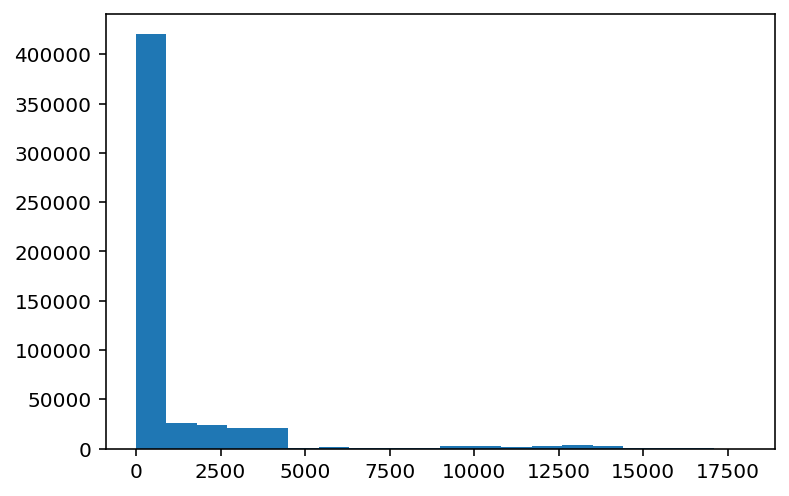

In [28]:
# samples with equal geohash and geohash5 value
plt.hist(df1['distance'], bins=20, range=(0, 18000))
print("Number and proportion of samples with distance greater than 10 km: %d, %.2f%%" % (np.sum(df1['distance']>10), np.mean(df1['distance']>10)*100))
print("Number and proportion of samples with distance greater than 1 km: %d, %.2f%%" % (np.sum(df1['distance']>1), np.mean(df1['distance']>1)*100))
print("Maximal distance in the samples with equal geohash and geohash5 value: %f km" % np.max(df1['distance']))
print("Minimal distance in the samples with equal geohash and geohash5 value: %f km" % np.min(df1['distance']))
plt.savefig("C:/Users/Justin\\Dropbox\\Amenity\\output\\analysis\\veraset_gravy_gps_sample_analysis\\veraset_home_work_locations\\new_home_location/unmatched_dis.jpg")


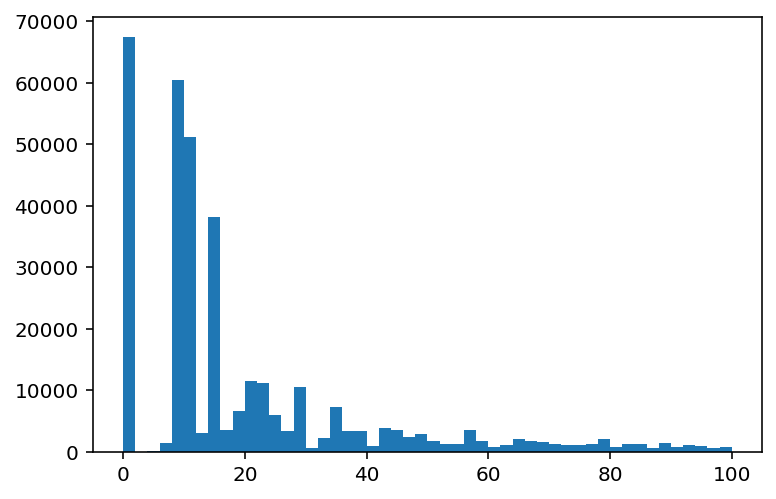

In [27]:
plt.hist(df1['distance'], bins=50, range=(0,100))
plt.savefig("C:/Users/Justin\\Dropbox\\Amenity\\output\\analysis\\veraset_gravy_gps_sample_analysis\\veraset_home_work_locations\\new_home_location/unmatched_dis_0_100.jpg")

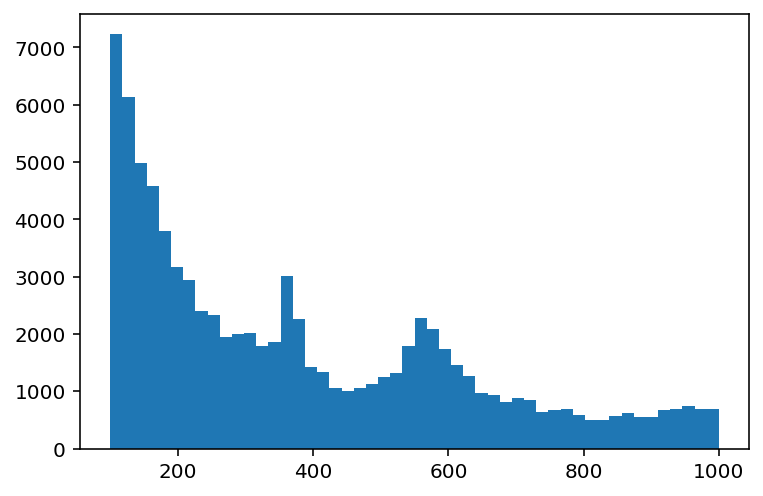

In [26]:
plt.hist(df1['distance'], bins=50, range=(100, 1000))
plt.savefig("C:/Users/Justin\\Dropbox\\Amenity\\output\\analysis\\veraset_gravy_gps_sample_analysis\\veraset_home_work_locations\\new_home_location/unmatched_dis_100_1000.jpg")

In [8]:
df2 = df1[df1['region']!= "california"]
df2.head()

#不在CA的，184,356 samples in total

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,caid,region,geo_hash5,num_geohash_caid,num_records_overnight,num_records_weekday_daytime,_merge,geohash5_imputed,any_match,matched,veraset_geohash,our_geohash,veraset_lat,veraset_lon,our_lat,our_lon,distance
12,12,12,12,00005fff42e7001241a68fedb113362f445569ea08543e...,illinois,dp3w5,1,266,241,Matched (3),dp3jk,0,0,"('41.9', '-87.7')","('41.7', '-88.4')",41.9,-87.7,41.7,-88.4,62.140700
25,25,25,25,0000bce224eda25a9a1015ac053243ab1ece2f3ad4086d...,center district,sv8zd,1,100,28,Matched (3),dnh08,0,0,"('32.3', '34.9')","('33.9', '-84.4')",32.3,34.9,33.9,-84.4,10296.295744
29,29,29,29,0000d7c148f0d4cedfcdfb21467ff9f1c2bc842cc70296...,arizona,9tbt8,1,2,0,Matched (3),9q5cg,0,0,"('33.3', '-111.8')","('34.1', '-118.3')",33.3,-111.8,34.1,-118.3,607.743771
32,32,32,32,0000e7c9ab6511de9a4395364d067e570b13e7907725ee...,NaN,u87u8,1,50,0,Matched (3),9wbmq,0,0,"('47.2', '27.8')","('38.9', '-111.9')",47.2,27.8,38.9,-111.9,9641.144629
65,65,65,65,0001bac660fbabdfa3914aa1a27e9e85b2557561db1ff8...,texas,9vk2g,1,8,6,Matched (3),9vk0u,0,0,"('29.7', '-95.1')","('29.7', '-95.4')",29.7,-95.1,29.7,-95.4,28.976217


Number and proportion of samples with distance greater than 10 km: 159417, 86.47%
Maximal distance in the samples with equal geohash and geohash5 value: 18713.953482 km


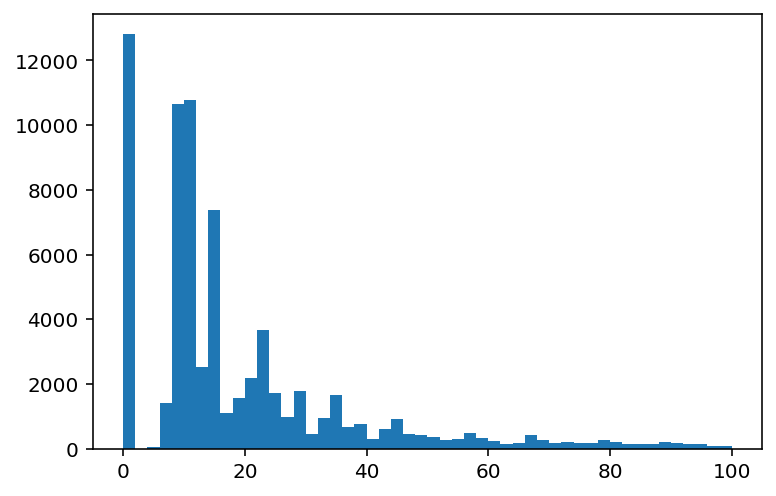

In [25]:
plt.hist(df2['distance'], bins=50, range=(0, 100))
print("Number and proportion of samples with distance greater than 10 km: %d, %.2f%%" % (np.sum(df2['distance']>10), np.mean(df2['distance']>10)*100))
print("Maximal distance in the samples with equal geohash and geohash5 value: %f km" % np.max(df2['distance']))
plt.savefig("C:/Users/Justin\\Dropbox\\Amenity\\output\\analysis\\veraset_gravy_gps_sample_analysis\\veraset_home_work_locations\\new_home_location/unmatched_notca_dis_0_100.jpg")

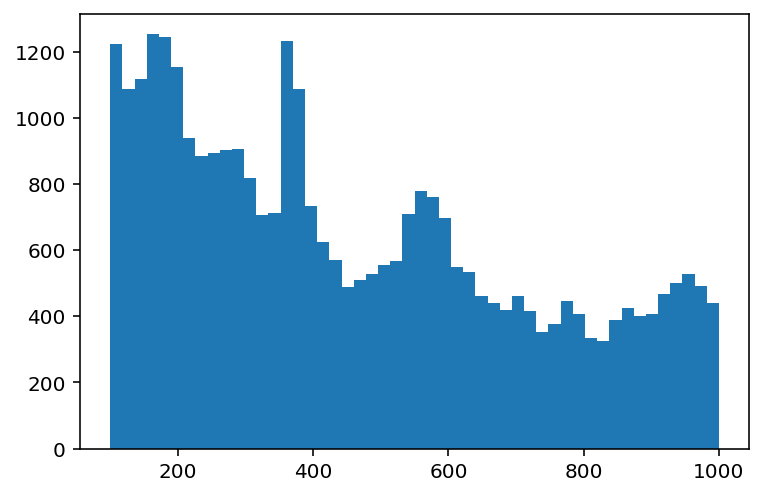

In [24]:
plt.hist(df2['distance'], bins=50, range=(100, 1000))
plt.savefig("C:/Users/Justin\\Dropbox\\Amenity\\output\\analysis\\veraset_gravy_gps_sample_analysis\\veraset_home_work_locations\\new_home_location/unmatched_notca_dis_100_1000.jpg")

In [10]:
df3 = df1[df1['region'] == "california"]
df3.head()
#349,752 samples in total

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,caid,region,geo_hash5,num_geohash_caid,num_records_overnight,num_records_weekday_daytime,_merge,geohash5_imputed,any_match,matched,veraset_geohash,our_geohash,veraset_lat,veraset_lon,our_lat,our_lon,distance
1,1,1,1,0000096512b9cce231abdec8d6ea460d2e750123161cb5...,california,9q5fb,1,12,8,Matched (3),9q5fc,0,0,"('34.3', '-118.5')","('34.3', '-118.4')",34.3,-118.5,34.3,-118.4,9.185794
7,7,7,7,00003acb9ccc8fc0d93afb6dafebe4a6ef6194c09137b4...,california,9q5fr,1,4,3,Matched (3),9q5ch,0,0,"('34.2', '-118.1')","('33.9', '-118.3')",34.2,-118.1,33.9,-118.3,38.109147
15,15,15,15,0000741cd8a733249322bfd5eb9a29c4f15f9196ecf39a...,california,9qh6p,1,2,0,Matched (3),9qhd2,0,0,"('34.1', '-117.4')","('34.2', '-117.4')",34.1,-117.4,34.2,-117.4,11.119493
17,17,17,17,0000802f4d3324205f79f9906a4d0b21cdb2acbc714222...,california,9qh95,1,64,7,Matched (3),9qh3y,0,0,"('33.9', '-117.3')","('34.1', '-117.5')",33.9,-117.3,34.1,-117.5,28.887590
21,21,21,21,00009d086da0c2c0a2a1e4c3b7f84d72069030233f335a...,california,9q8ym,1,15,12,Matched (3),9q9nf,0,0,"('37.7', '-122.5')","('37.8', '-122.2')",37.7,-122.5,37.8,-122.2,28.624220


Number and proportion of samples with distance greater than 10 km: 245476, 70.19%
Maximal distance in the samples with equal geohash and geohash5 value: 9950.748369 km


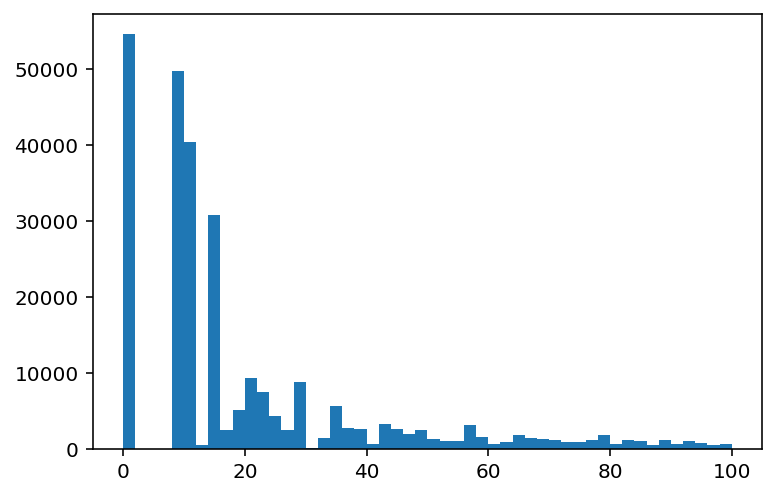

In [23]:
plt.hist(df3['distance'], bins=50, range=(0, 100))
print("Number and proportion of samples with distance greater than 10 km: %d, %.2f%%" % (np.sum(df3['distance']>10), np.mean(df3['distance']>10)*100))
print("Maximal distance in the samples with equal geohash and geohash5 value: %f km" % np.max(df3['distance']))
plt.savefig("C:/Users/Justin\\Dropbox\\Amenity\\output\\analysis\\veraset_gravy_gps_sample_analysis\\veraset_home_work_locations\\new_home_location/unmatched_ca_dis_0_100.jpg")

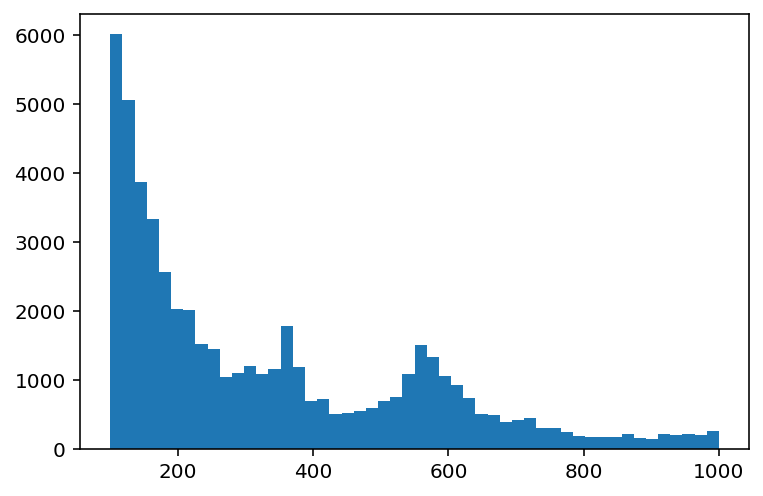

In [22]:
plt.hist(df3['distance'], bins=50, range=(100, 1000))
plt.savefig("C:/Users/Justin\\Dropbox\\Amenity\\output\\analysis\\veraset_gravy_gps_sample_analysis\\veraset_home_work_locations\\new_home_location/unmatched_ca_dis_100_1000.jpg")

In [11]:
df.to_csv(file)